<a href="https://colab.research.google.com/github/Ash-git-create/Data_Analytics_1_WiSe2024/blob/main/Day_3_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **T-Test, Z-Test, ANOVA and Corealtion/Regression**
Importing the dataset and libraries

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris
from scipy.stats import ttest_ind, zscore, f_oneway

Iris=sns.load_dataset('iris')
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


T-test setsosa vs virginica

In [12]:
Setosa = Iris[Iris['species'] == 'setosa']
Virginica = Iris[Iris['species'] == 'virginica']
alpha=0.05 #Level of significance
t_stat, p_val = ttest_ind(Setosa['petal_length'], Virginica['petal_length'])
print('T-statistic:', t_stat)
print('P-value:', p_val)

if p_val < alpha:
    print("Outcome : Null hypothesis rejected :Means are significantly different.")
else:
    print("Outcome : Failed to reject Null hypothesis: Means are almost equal.")

T-statistic: -49.98618625709594
P-value: 1.5048006992427275e-71
Outcome : Null hypothesis rejected :Means are significantly different.


Z-Test

In [19]:
Given_mean = 5.0
Population_SD = 0.5
Mean_sepal_length = Iris['sepal_length'].mean()
sample_size = len(Iris['sepal_length'])
z_stat = (Mean_sepal_length - Given_mean) / (Population_SD / np.sqrt(sample_size))
print('Z-statistic:', z_stat)
#print(Mean_sepal_length) # Testing if the sample mean is actually greater than the given mean

Z-statistic: 20.657363497471476
5.843333333333334


ANOVA

In [20]:
Setosa_petal_width = Setosa['petal_width']
Virginica_petal_width = Virginica['petal_width']
Versicolor_petal_width= Iris[Iris['species'] == 'virginica']['petal_width']
f_stat, p_val_anova = f_oneway(Setosa_petal_width, Versicolor_petal_width, Virginica_petal_width)
print('F-statistic:', f_stat)
print('P-value:', p_val_anova)

if p_val_anova < alpha: #alpha defined above as 0.05
    print("Outcome : Null hypothesis rejected :Means are significantly different.")
else:
    print("Outcome : Failed to reject Null hypothesis: Means are almost equal.")

F-statistic: 978.073734344682
P-value: 1.1665390149349088e-85
Outcome : Null hypothesis rejected :Means are significantly different.


Correlation/Regression

In [22]:
#Explore relationship between sepal length and petal length
Correlation = Iris['sepal_length'].corr(Iris['petal_length'])
print("Correlation coefficient:", Correlation)

Correlation coefficient: 0.8717537758865831


In [23]:
from statsmodels.formula.api import ols
Regression = ols('petal_length ~ sepal_length', data=Iris).fit()
print(Regression.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.04e-47
Time:                        21:34:22   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.1014      0.507    -14.016   

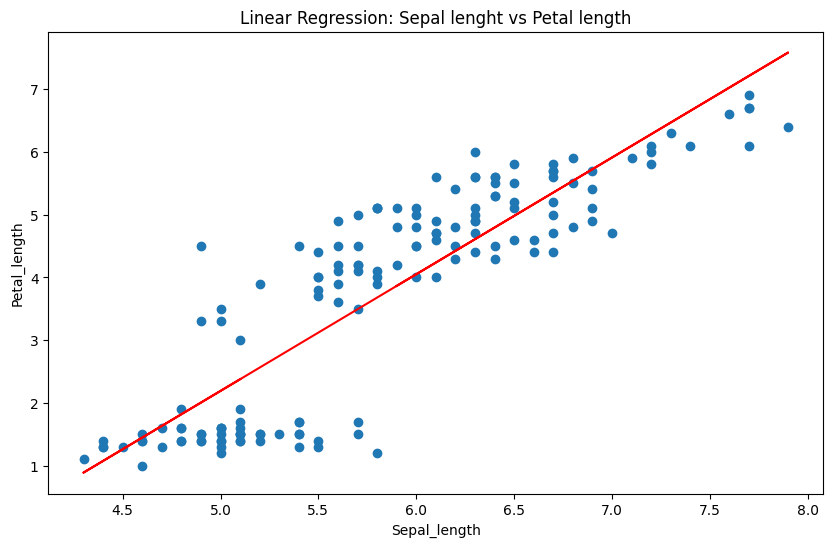

In [26]:
#Ploting the output of the leniar regression
plt.figure(figsize=(10, 6))
plt.scatter(Iris['sepal_length'], Iris['petal_length'])
plt.plot(Iris['sepal_length'], Regression.predict(), color='red')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_length')
plt.title('Linear Regression: Sepal lenght vs Petal length')
plt.show()